In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy
  
# read image
src = cv2.imread('/content/drive/MyDrive/FYP_Dataset/0/celebref (1).jpg', cv2.IMREAD_UNCHANGED)
 
# apply guassian blur on src image
dst = cv2.GaussianBlur(src,(5,5),cv2.BORDER_DEFAULT)

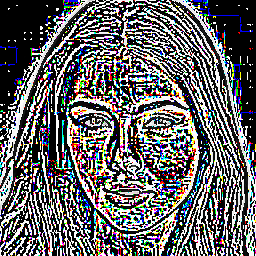

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(dst - src)

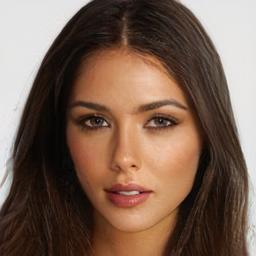

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(src)

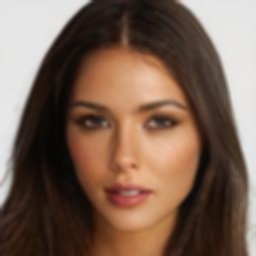

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(dst)

In [ ]:
from PIL import Image
import numpy as np
from skimage.util import random_noise
from google.colab.patches import cv2_imshow
import cv2
import os
import numpy as np

for filename in os.listdir('/content/drive/MyDrive/StyleGAN2_Datasets/Gaussian_Dataset/1_fake'):
  im = Image.open('/content/drive/MyDrive/StyleGAN2_Datasets/Gaussian_Dataset/1_fake/' + filename)
  # convert PIL Image to ndarray
  im_arr = np.asarray(im)

  # random_noise() method will convert image in [0, 255] to [0, 1.0],
  # inherently it use np.random.normal() to create normal distribution
  # and adds the generated noised back to image
  noise_img = random_noise(im_arr, mode='gaussian', var=0.05**2)
  noise_img = (255*noise_img).astype(np.uint8)

  img = Image.fromarray(noise_img)
  img.save('/content/drive/MyDrive/StyleGAN2_Datasets/Gaussian_Dataset/1_fake/' + filename)

In [ ]:
!apt-get install libsvm-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libsvm3
The following NEW packages will be installed:
  libsvm-dev libsvm3
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 69.1 kB of archives.
After this operation, 212 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libsvm3 amd64 3.21+ds-1.1 [40.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libsvm-dev amd64 3.21+ds-1.1 [29.1 kB]
Fetched 69.1 kB in 1s (124 kB/s)
Selecting previously unselected package libsvm3.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../libsvm3_3.21+ds-1.1_amd64.deb ...
Unpacking libsvm3 (3.21+ds-1.1) ...
Selecting previously unselected package libsvm-dev.
Preparing to unpack .../libsvm-dev_3.21+ds-1.1_amd64.deb ...
Unpacking libsvm-dev (3.21+ds-1.1) ...
Setting up 

In [ ]:
pip install -U pip==18.1

     |████████████████████████████████| 1.3 MB 5.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pip-tools 6.2.0 requires pip>=20.3, but you have pip 18.1 which is incompatible.


In [ ]:
!pip install --process-dependency-links pybrisque

    100% |████████████████████████████████| 143kB 5.5MB/s 
DEPRECATION: Dependency Links processing has been deprecated and will be removed in a future release. A possible replacement is PEP 508 URL dependencies. You can find discussion regarding this at https://github.com/pypa/pip/issues/4187.
    100% |████████████████████████████████| 174kB 11.4MB/s 
  Running setup.py bdist_wheel for pybrisque ... done
  Stored in directory: /root/.cache/pip/wheels/4a/f2/58/326df6416180141128635d5a2d0f9678655da3f47cbe975285
  Running setup.py bdist_wheel for libsvm ... done
  Stored in directory: /root/.cache/pip/wheels/5e/9e/b5/dbb033107407eec2f52b8cd24cf024a4b9ec8b62ea5aee995a
Successfully built pybrisque libsvm


In [ ]:
from libsvm import svmutil 

In [ ]:
from brisque import BRISQUE

brisq = BRISQUE()

# **StyleGAN**

In [ ]:
import os
path = '/content/drive/MyDrive/StyleGAN2_Datasets/Naive_Dataset/0_real/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[41.54282976493971, 92.44664397642975, 40.88147326508408, 33.94434796100086, 33.06831361625427, 37.78605340718923, 36.985728968945295, 40.476106697621844, 38.902170629212605, 46.03861251069657, 31.655075122512926, 35.31260084980613, 32.63413827631564, 44.32069216731804, 32.12847973236694, 33.10281594629578, 32.7068644443458, 36.57242291240118, 34.52926062204858, 36.536393421052935, 48.556738707001614, 34.74500504759999, 44.64494869629334, 35.79671993333773, 91.0913637913527, 26.863185553515905, 32.3975970298103, 35.78571214110093, 34.549720707075835, 40.33724814640982, 26.853057627709973, 43.32505726290901, 39.46572809059364, 28.51810007359427, 43.60483698922849, 33.64637533967357, 31.606305249689285, 50.25726425808671, 30.197837143347783, 53.141427756998496, 38.04080439664119, 35.24661686267382, 39.10680124649127, 40.24863880982423, 41.64728433198627, 38.43834096443413, 33.03785384425214, 41.28916143437573, 46.6984604417828, 27.461348600611586, 46.228508383629105, 56.791717256173115, 

In [ ]:
import statistics
style_naive_real = statistics.mean(brisque_arr)
print(style_naive_real)

41.89413151625654


In [ ]:
import os
path = '/content/drive/MyDrive/StyleGAN2_Datasets/Naive_Dataset/1_fake/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[33.09293424365478, 24.915711481830954, 37.81108947961832, 29.756251335207253, 23.767598544408997, 26.98587189405532, 27.89367537519047, 34.65083241887987, 26.132285666956932, 36.79042944693583, 27.185453287813402, 33.52357410708635, 26.60331170845984, 28.739862117090752, 42.51093121912447, 27.845335897206724, 30.544585369370566, 30.12085714104103, 31.458079787066026, 28.85140612831742, 20.827047163942098, 26.803734733225838, 23.204722748068775, 25.19687678090338, 35.91005969483831, 30.405050209633487, 29.460162260246648, 31.967319259594774, 25.079804810169662, 27.326350628039336, 27.743834784798764, 37.12274948555876, 26.557080903735596, 30.50084183155775, 27.47299396902497, 28.448369694589815, 28.299398231281884, 28.485993652142383, 38.575220460347396, 26.148416648429816, 24.190661894670257, 30.609246003907288, 40.681777454958365, 22.06862938946506, 26.748554110731675, 40.31890081584436, 20.818122835604868, 24.607809367762115, 29.522393585917143, 31.707229062140073, 26.69982946777418

In [ ]:
import statistics
style_naive_fake = statistics.mean(brisque_arr)
print(style_naive_fake)

33.23080885708077


In [ ]:
import os
path = '/content/drive/MyDrive/StyleGAN2_Datasets/Gaussian_Dataset/1_fake/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[56.75547807235523, 57.63680423889036, 63.516938552039846, 66.49945885759041, 64.16905762696905, 50.605970125810245, 55.03761551236835, 63.23768483785136, 63.99189589018022, 58.5260222108609, 61.69917982019888, 59.51775477583885, 59.11650842925235, 60.74843427549831, 61.27062483682653, 57.68019783977388, 70.26861106757207, 63.72221148182183, 62.19281496188239, 62.16958294445749, 59.46798877059064, 62.899780140030884, 62.08781688674355, 59.235533404568855, 56.36169796969523, 55.2212388899394, 67.35060064381582, 56.35597705601583, 66.71239126216852, 59.117012645052796, 65.12720739360748, 60.672175883134514, 57.51710070623619, 66.79526137213651, 60.55227249898951, 54.528359220276684, 56.193973821854, 66.67873304692569, 64.71960657793267, 62.88710016529956, 62.79454246674834, 68.03875634677439, 57.09939461748331, 63.1595733645529, 51.75343928620873, 53.02999812578719, 63.707151719847445, 61.74774147177709, 60.68920066301405, 58.948772216892394, 63.062374630968066, 53.37212468620339, 65.093

In [ ]:
import statistics
style_gaussian_fake = statistics.mean(brisque_arr)
print(style_gaussian_fake)

61.41463137041408


In [ ]:
import os
path = '/content/drive/MyDrive/StyleGAN2_Datasets/Gaussian_Dataset/0_real/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[33.56285775766594, 56.030395956416214, 44.92780889137009, 52.78572343181247, 38.544356003635926, 36.17041338950787, 39.25283011869567, 39.316909045029206, 36.61739473428952, 39.90561260607592, 47.272655152633206, 42.78113039586242, 42.16058741370739, 43.46909692910731, 43.63980632778339, 56.33474589257867, 43.51246829665001, 55.93800293660877, 41.09270721379778, 41.03297139834035, 46.622833422457234, 30.458417946540067, 50.306474207305314, 40.8859280455232, 58.46658298631871, 32.84275339503688, 49.72593696767785, 57.6655963195883, 59.03472308871255, 59.85081331520587, 40.13967739956695, 34.01391681348389, 48.08921339273047, 54.14637854968282, 34.57242802480823, 45.752068870596986, 46.651108739603956, 40.15082665545151, 59.34946811198233, 51.75602120787164, 49.51105936275394, 52.09698842221246, 49.34037967419988, 51.8273975302302, 40.379988672924355, 42.304256294960624, 57.01717379335298, 47.220224022629736, 43.13837844223565, 54.47242772547793, 46.63506261589771, 36.477481520810215, 3

In [ ]:
import statistics
style_gaussian_real = statistics.mean(brisque_arr)
print(style_gaussian_real)

48.13444436622701


In [ ]:
import os
path = '/content/drive/MyDrive/StyleGAN2_Datasets/Gaussian_Denoised_Dataset/0_real/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[50.82612474847497, 46.45115539631672, 60.792896970607444, 48.0015729671868, 46.82891277859221, 49.32046499319665, 44.21177477185222, 42.62833517530794, 41.75025482977412, 42.823223905474606, 38.27303785979245, 46.218659751986934, 42.62988019643865, 43.69895716172141, 29.991982199438667, 42.750252677771186, 50.94914387683468, 41.237245941148785, 52.85130790659434, 49.57599888040818, 50.55614616174478, 47.11321785906648, 47.733741984803714, 39.38833877482148, 53.18193990427926, 50.474517796667556, 54.23623001743522, 43.66303699871855, 33.14041541978088, 52.32192495850302, 41.313795956366675, 48.35917616394795, 43.98059714818146, 24.77755267769362, 40.333578769754695, 38.61755215983044, 36.455177226621345, 32.105777845700345, 52.103470332184884, 47.96603070756623, 38.49311538046038, 51.25857689391955, 54.949612591632786, 43.541527712458105, 36.210369044781714, 42.99991879040226, 45.308427949295265, 54.62483405184855, 43.353846603277134, 36.95188855147592, 42.467933452558896, 74.387427660

In [ ]:
import statistics
style_gaussian_denoised_real = statistics.mean(brisque_arr)
print(style_gaussian_denoised_real)

46.75184372339985


In [ ]:
import os
path = '/content/drive/MyDrive/StyleGAN2_Datasets/Gaussian_Denoised_Dataset/1_fake/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[58.9509394601514, 51.68791268879477, 39.142552473710566, 51.806321272259765, 51.11636869679796, 59.45997821304934, 46.15774912974632, 50.85640616168189, 36.910920819872786, 45.289789300810526, 48.4900266334339, 49.13831413872026, 42.93669057830209, 36.42436005761692, 41.84906444930732, 33.96831382072844, 48.89202021754909, 46.30967674654141, 32.547285181626535, 49.88487227446137, 40.395987243135664, 33.919347038605, 35.564192806707865, 43.8253507351144, 44.20502910723417, 43.50854849074517, 43.64021472901493, 42.49565466816364, 51.49602681697729, 46.62481873798856, 40.87143254958676, 42.252075834875995, 42.709423621733094, 34.11339689366355, 31.353625328900193, 47.379963463486774, 34.02072558091004, 49.43691484467104, 46.68653966689442, 56.60951692482092, 46.241059494093406, 28.095023085394246, 48.106010145486835, 59.665502524306135, 41.73982035010408, 49.90077174179612, 44.47813069086851, 51.4430483665717, 40.691308007400266, 42.68028066845932, 34.430024554958095, 55.44388147813072, 

In [ ]:
import statistics
style_gaussian_denoised_fake = statistics.mean(brisque_arr)
print(style_gaussian_denoised_fake)

44.63905645883822


In [ ]:
import os
path = '/content/drive/MyDrive/StyleGAN2_Datasets/Adversarial_Dataset/0_real/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[34.3143927773549, 51.77475722427198, 61.51871990050279, 41.97274147828455, 52.340578286574896, 51.85907199340147, 52.58820657909632, 62.73797743572629, 53.80814683267192, 55.981885507061975, 47.49561153163779, 57.11755706631254, 47.629521370738644, 60.70307699843602, 61.965653082859944, 54.44545457122524, 59.487196981552756, 45.10349158725637, 49.677123863767406, 50.059025369405504, 44.02288348432239, 47.81514789273899, 55.52435731811829, 65.50004663033292, 50.77185931445115, 55.17869508346075, 47.855908595927644, 51.21645550702567, 78.3314420516183, 61.2305606924491, 61.5832482787622, 45.07615427456926, 49.37458380456076, 53.61385729024573, 48.93641472594015, 47.30030259036721, 53.80658979765997, 44.3250327566825, 56.94470287983302, 56.87830272413737, 52.49693794202665, 42.0693066842191, 57.98347331237221, 49.76925345636005, 61.569770915104414, 52.89542747934104, 53.653698458208396, 50.53574701791831, 72.84739044304843, 47.89184596244718, 37.49994381731642, 39.97721386363594, 78.8871

In [ ]:
import statistics
style_adversarial_real = statistics.mean(brisque_arr)
print(style_adversarial_real)

51.435688192537555


In [ ]:
import os
path = '/content/drive/MyDrive/StyleGAN2_Datasets/Adversarial_Dataset/1_fake/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[50.8180526196212, 55.52583657506102, 56.04513649693399, 49.27074345965855, 53.70045158268135, 59.78505079806382, 50.423939211492325, 59.23756231235461, 58.374419349234586, 43.89523599900804, 58.09934339545339, 52.17211025653194, 50.82031161682653, 50.5841773008882, 49.849941881101586, 56.50043457202719, 57.28870275321856, 50.53847058707629, 56.72112878077496, 59.42291225180497, 46.44091812875865, 55.56832594279774, 58.57390784569179, 62.40419142335736, 57.61051700858684, 79.90131756802714, 55.20301033293697, 52.74585404410459, 51.856702776377574, 50.29041986489267, 53.7361598145842, 54.88532818954559, 48.75063592406207, 47.75944038432419, 60.423263364266745, 47.29678719170943, 54.580644215497045, 56.59992568225971, 51.37315059345531, 57.7522136310472, 52.79063760091901, 57.68129713832934, 51.85509270638181, 60.20054898869466, 55.29214606604853, 56.70440724618891, 61.52481562937567, 57.31426015963086, 61.920844122871245, 49.14177160906729, 50.4419506287511, 54.054903787621015, 50.40097

In [ ]:
import statistics
style_adversarial_fake = statistics.mean(brisque_arr)
print(style_adversarial_fake)

54.001308010855944


In [ ]:
import os
path = '/content/drive/MyDrive/StyleGAN2_Datasets/Adversarial_Denoised_Dataset/1_fake/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[38.45673381992742, 44.13112943961323, 52.78723505546907, 50.22630054450997, 43.56175601711732, 64.77301209889708, 32.83959553359966, 38.210960620656465, 37.63543986441243, 41.25332730333571, 49.505605246775076, 21.852120828203965, 60.56364872428048, 41.852503572233445, 48.24399677659687, 55.291976770943165, 50.39448893472877, 58.30568899663069, 50.926950718332705, 47.00734179606138, 44.23057462820816, 40.50674720225163, 58.77641294459306, 50.0963283497025, 55.39431416788466, 53.90357517073278, 48.5197717276742, 61.88752891309139, 48.364124386792355, 28.142125463252114, 52.8731776841239, 53.905605934750724, 44.09295444945076, 45.87438152583502, 41.499972863632365, 52.78762378800457, 50.87894356632535, 54.20170613270261, 43.809680615058596, 46.250584071828484, 45.39509955263247, 48.107248669088335, 45.64758774785071, 48.37737660975256, 47.30013162299656, 60.04485750967217, 47.70785995134338, 50.14606035586553, 36.35962906698103, 35.70097923095352, 45.32273669939798, 52.06520091760615, 4

In [ ]:
import statistics
style_adversarial_denoised_fake = statistics.mean(brisque_arr)
print(style_adversarial_denoised_fake)

48.32887841124498


In [ ]:
import os
path = '/content/drive/MyDrive/StyleGAN2_Datasets/Adversarial_Denoised_Dataset/0_real/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[45.44052734210027, 58.92263913255579, 32.809419439069416, 33.12199841721599, 52.81526340652783, 49.15144336892024, 50.04916715798913, 57.39258861136625, 52.18561620794071, 44.48748657346698, 46.15611004856248, 52.42854192456093, 34.37318253994658, 37.54907714355136, 60.642228453593134, 47.42484805766014, 43.04050370922914, 50.71293355392004, 53.54049440252743, 52.91992324346859, 60.56386283546419, 55.38975668105695, 50.71401290700123, 48.43241058342585, 41.076270995584196, 46.66582137127887, 56.37198992173808, 59.818262435203565, 64.85405254735997, 44.29861354082425, 36.68948070476313, 60.12330048828983, 55.98034356974881, 38.523867360338045, 45.12975124264858, 48.184621300642675, 41.33906856585031, 53.29368288324042, 51.19845704770705, 48.35108185167542, 51.396654422196434, 39.27309196235376, 74.2013364016907, 53.928502405784, 51.49719982205204, 55.081227018723666, 40.2282453617031, 54.79678717877414, 49.20936144830944, 51.95469194498639, 48.84522718492224, 57.934255623685544, 50.828

In [ ]:
import statistics
style_adversarial_denoised_real = statistics.mean(brisque_arr)
print(style_adversarial_denoised_real)

49.29999339160335


In [ ]:
import os
path = '/content/drive/MyDrive/StyleGAN2_Datasets/Adversarial_Blur_Dataset/0_real/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[24.718221783897206, 42.91686687990466, 30.209096347162586, 57.390552126375496, 29.155196717773947, 36.50397987086319, 50.071644774187234, 47.05046197461422, 43.885526199751894, 27.469768044690113, 82.04774089084606, 41.61470854244021, 41.25121397449789, 74.0500548650989, 54.154165189119, 26.867025844081695, 45.70956867481823, 35.19295100933107, 38.03678462651044, 29.184722743929797, 83.83723576248497, 45.61598770099897, 40.96344741595942, 40.683783544783864, 38.20394083456563, 48.05942233565395, 42.727859548472225, 61.72841907859208, 30.318383973238724, 36.78543081213604, 38.87618846947748, 35.93671473954032, 51.59586849334414, 32.28871083343654, 38.53249418726011, 34.72627223714835, 30.262234691274557, 48.83578297660779, 56.14528927388119, 46.83759240254756, 28.193197955817936, 52.12470974367682, 60.319287426968344, 38.79409609224456, 39.309299171407474, 34.79013910278866, 41.09381497574964, 29.452174193205792, 43.88637757836182, 37.51326603540144, 53.81646699074099, 35.7804613630839

In [ ]:
import statistics
style_adversarial_blur_real = statistics.mean(brisque_arr)
print(style_adversarial_blur_real)

40.99210765267744


In [ ]:
import os
path = '/content/drive/MyDrive/StyleGAN2_Datasets/Adversarial_Blur_Dataset/1_fake/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[26.803734733225838, 50.369223282590724, 46.40804864822985, 20.827047163942098, 28.85140612831742, 35.91005969483831, 25.19687678090338, 46.881619426108614, 31.458079787066026, 57.13224394519875, 26.748554110731675, 30.12085714104103, 29.756251335207253, 81.7982339780765, 24.607809367762115, 26.132285666956932, 33.09293424365478, 26.60331170845984, 31.707229062140073, 26.148416648429816, 56.99007690447809, 36.79042944693583, 37.81108947961832, 28.485993652142383, 27.185453287813402, 24.190661894670257, 47.06459006038688, 28.739862117090752, 23.767598544408997, 40.31890081584436, 30.609246003907288, 22.06862938946506, 29.522393585917143, 40.681777454958365, 32.73866934502985, 26.98587189405532, 20.818122835604868, 27.845335897206724, 24.915711481830954, 27.035733649778763, 27.102316537969386, 48.18688294350841, 48.855162472493134, 37.12274948555876, 27.956171516180348, 31.78585990520571, 29.811371512863047, 51.20643321802811, 31.967319259594774, 55.87786399106881, 27.47299396902497, 28.

In [ ]:
import statistics
style_adversarial_blur_fake = statistics.mean(brisque_arr)
print(style_adversarial_blur_fake)

44.500475274437896


In [ ]:
import os
path = '/content/drive/MyDrive/StyleGAN2_Datasets/Adversarial_Blur_Deblurred_Dataset/1_fake/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[33.01199493684851, 54.67698463421698, 40.743520973395675, 30.17666355718154, 29.743795677474395, 32.651047200594576, 34.7893065072293, 32.3356217668894, 80.16578990926143, 40.92379330868414, 36.74669620625309, 38.20789844944659, 26.52471140451928, 39.048003906762915, 27.693886476153125, 41.38520594258057, 41.62546214778331, 50.44668795653854, 32.78261148279637, 30.93584799120913, 38.411880161347426, 34.7319581843135, 29.219177651341283, 52.271191733771275, 43.102088334975974, 44.665365404438376, 27.79082156583445, 32.54248228523784, 34.279409835505476, 34.295711251358284, 29.727932891507976, 35.10790511180187, 44.330087531307754, 35.623638202577354, 31.147844584669087, 31.43678324400787, 37.24971788287223, 37.29039499801024, 36.00297045937418, 45.116987633560484, 48.63286569170634, 31.903653084587745, 33.07098316616759, 49.57117378194198, 35.72364566844999, 43.4825295292427, 34.535785370602184, 28.813459044086812, 42.879599408983495, 38.92768873596947, 30.43701770933967, 32.3614037418

In [ ]:
import statistics
style_adversarial_blur_deblurred_fake = statistics.mean(brisque_arr)
print(style_adversarial_blur_deblurred_fake)

43.74009885658721


In [ ]:
import os
path = '/content/drive/MyDrive/StyleGAN2_Datasets/Adversarial_Blur_Deblurred_Dataset/0_real/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[37.14965746777625, 32.201337078946835, 36.123649874167995, 40.771862461012915, 31.70071669719721, 33.51936837655819, 43.98516429254448, 30.256762849986444, 35.77625687451484, 35.66624834792003, 37.88481561611604, 41.045954402219536, 19.205031223017272, 28.68442821790893, 40.75817919328449, 65.17859901778252, 31.31231392633788, 53.01921724651413, 37.71784143424736, 47.003347262143734, 36.23098270768969, 49.47315633521464, 41.983848601172554, 31.98775600747956, 37.56494491605122, 81.94969800372189, 34.90862408581643, 52.71517183764081, 36.53764407459619, 56.69857844503315, 39.06983345921833, 33.35772075184752, 31.053567338557627, 53.969845669842584, 35.64069685595314, 39.99666802106924, 49.29443248390555, 38.006705370234954, 34.58713267065207, 33.18807344213781, 49.45652782047773, 39.91450622477464, 45.31626612027958, 32.59251324789727, 64.47244610656685, 27.892537073708695, 37.5834556808702, 41.50394864501402, 58.81081175562747, 40.861095098801115, 47.277732997021076, 53.06429518082234

In [ ]:
import statistics
style_adversarial_blur_deblurred_real = statistics.mean(brisque_arr)
print(style_adversarial_blur_deblurred_real)

40.90282553522446


# **StarGAN**

In [ ]:
import os
path = '/content/drive/MyDrive/FYP_Dataset/0_real/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[92.44664397642975, 41.54282976493971, 34.74500504759999, 33.94434796100086, 32.7068644443458, 36.985728968945295, 40.88147326508408, 32.12847973236694, 48.556738707001614, 35.79671993333773, 44.64494869629334, 36.57242291240118, 34.52926062204858, 35.78571214110093, 46.03861251069657, 33.10281594629578, 37.78605340718923, 91.0913637913527, 40.476106697621844, 31.655075122512926, 26.863185553515905, 33.06831361625427, 35.31260084980613, 36.536393421052935, 38.902170629212605, 34.549720707075835, 44.32069216731804, 32.63413827631564, 39.46572809059364, 33.64637533967357, 53.141427756998496, 35.24661686267382, 26.853057627709973, 30.197837143347783, 38.04080439664119, 32.3975970298103, 40.33724814640982, 31.606305249689285, 43.60483698922849, 40.24863880982423, 28.51810007359427, 43.32505726290901, 50.25726425808671, 39.10680124649127, 46.027237619078846, 27.461348600611586, 41.86899429657785, 33.79187912110217, 46.6984604417828, 40.35968073025572, 41.64728433198627, 38.94163941953161, 3

In [ ]:
import statistics
naive_real = statistics.mean(brisque_arr)
print(naive_real)

41.89413151625654


In [ ]:
import os
path = '/content/drive/MyDrive/FYP_Dataset/1_fake/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[41.64121719688251, 39.41334841515288, 33.5489713724653, 41.19992870606893, 34.28803788754692, 38.9338656644361, 40.22412788867018, 43.54969385662298, 40.19375399190244, 39.02361719523583, 36.733846035483566, 35.61662588510114, 45.4762441333977, 45.26940817265893, 36.56848148151266, 31.680302478354747, 33.11249897600885, 25.123419799252133, 37.38069821869499, 28.430090295873697, 35.92230845802317, 41.74086311204678, 34.452451586088046, 38.92883384821073, 38.450428064431776, 37.97698488449271, 26.74131641249278, 26.852710284897626, 34.903752768386425, 38.028283424693996, 32.47176093635335, 38.37515887394636, 41.52322652690884, 33.50744089571276, 34.182972803970756, 24.542379089866017, 34.930996755894625, 35.71077603240542, 36.35784695321297, 38.44165610022651, 28.562138319299038, 40.610031210478155, 30.123117942463068, 36.72941206086216, 37.766221080824494, 35.619772441655186, 37.46525725825961, 28.668238053613095, 36.67724710725861, 29.775695089829014, 31.932273149984553, 40.2337330366

In [ ]:
import statistics
naive_fake = statistics.mean(brisque_arr)
print(naive_fake)

36.57879402635143


In [ ]:
import os
path = '/content/drive/MyDrive/FYP_Dataset_Gaussian_Noise/1_fake/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[39.958591887847774, 38.85015808992557, 35.52425995699491, 37.245241051724406, 48.301819644464786, 32.90164901648086, 38.842671190205465, 46.52895473809224, 40.78063196613539, 33.83937613172691, 34.65225772565873, 41.18616736196668, 42.38747809335405, 37.88227161005375, 35.928907485709146, 41.72342933946652, 38.53955426066341, 38.95041381708745, 39.26086901450719, 41.00560770907123, 42.76609729499421, 36.07527857530022, 37.87540063779238, 40.67964669980097, 39.78280609236242, 40.30245172463958, 44.43436145139458, 35.197066411296305, 39.117142228226385, 33.901558425151165, 35.15302746935356, 37.528097812257556, 35.23577618953425, 37.238947504346584, 39.41774508714025, 37.64052691379118, 45.45779774599214, 39.68733417574708, 45.57825441571583, 43.370220131400174, 40.72852304038065, 50.02137505065127, 47.39963759100033, 40.736498893682096, 41.254172746067525, 37.120714958155645, 40.291695584082504, 44.74223258135078, 37.67993554394468, 44.45643917027144, 30.261092596251615, 34.27729893395

In [ ]:
import statistics
gaussian_fake = statistics.mean(brisque_arr)
print(gaussian_fake)

45.39323493222522


In [ ]:
import os
path = '/content/drive/MyDrive/FYP_Dataset_Gaussian_Noise/0_real/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[65.84873739207353, 50.156349093667814, 32.74033083880306, 31.524662808442145, 55.50311783085226, 44.46122604873881, 52.48697460706876, 56.35894759259975, 48.509393638139045, 44.234921763828424, 49.10986147412871, 46.41156571806732, 49.973360997581835, 49.026806871014514, 42.560881366805575, 47.908118438254974, 47.29080017207423, 54.757625801907466, 45.11647393495048, 48.60371433967907, 44.244419971196294, 46.56950110189814, 36.91453478916446, 57.13525740404566, 46.11889757516008, 46.28843030459109, 49.96786493969137, 40.257437483141416, 40.36722849376872, 49.721799009390566, 42.54034166982581, 51.145846340321896, 41.917023799695016, 33.833627110992666, 39.15541461739963, 41.74353891243004, 49.98444211800813, 50.6185929896518, 35.358397959855665, 48.50933593951993, 50.66072839266678, 50.26861701951532, 56.00721817060003, 39.40140114239898, 33.69655800536782, 36.26837958823285, 59.2904505751593, 53.46961071864405, 55.97352605656147, 53.8178499261312, 53.314780753604396, 59.3951302693409

In [ ]:
import statistics
gaussian_real = statistics.mean(brisque_arr)
print(gaussian_real)

48.25927427706529


In [ ]:
import os
path = '/content/drive/MyDrive/FYP_Dataset_Gaussian_Denoised/0_real/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[53.90175457963085, 48.61265088194136, 47.31097875362627, 40.51426081603279, 39.344253575582115, 46.771814342861376, 37.81609415099467, 44.55031984257505, 47.11189649695882, 55.706842942467574, 58.59168522474431, 62.69927044722101, 43.11629711077023, 45.706331080005725, 46.91391858191207, 45.86978249788376, 56.4779625822689, 61.203505909304454, 46.92684522196976, 49.517954730276415, 49.226621276147284, 50.658024409429686, 44.18452054504826, 46.269789705641074, 44.12815028407681, 36.33368019597333, 48.092390132470086, 50.601016815301364, 45.63917895826887, 50.46476750171462, 48.890637713564615, 47.09532863648269, 56.81254284649583, 53.395735614757086, 51.83596062480308, 48.15125578785478, 67.89247331560784, 9.32001578341442, 54.38342532381478, 40.3549936403798, 36.506124787060685, 63.23572399794023, 45.00276914441906, 43.154613178614454, 40.58093188571377, 35.46456196819679, 39.23978074516333, 38.011526675216146, 42.80277631746378, 46.626963492391155, 40.48257118308129, 32.3322226798244

In [ ]:
import statistics
gaussian_denoised_real = statistics.mean(brisque_arr)
print(gaussian_denoised_real)

46.643757575746555


In [ ]:
import os
path = '/content/drive/MyDrive/FYP_Dataset_Gaussian_Denoised/1_fake/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[44.880281625949465, 42.51206174930235, 45.7675198348104, 48.05439738355824, 47.20746120631759, 31.23266653870246, 44.93450632858185, 45.46868234088686, 44.618217857531135, 45.76365741592679, 55.16276368583556, 33.71908587674773, 33.19197348318437, 35.789530174830816, 50.78680265726314, 43.624881077325654, 34.76694909782225, 52.264027936279945, 39.2161319876451, 39.937100615198574, 43.68984321718824, 48.04767937897839, 42.985061292002115, 43.9027145968887, 39.858142399369285, 44.6952372302693, 43.83810040467165, 40.78009311269341, 49.58372321914601, 43.14518812229676, 48.79192025727855, 33.433865656454714, 47.7502113122531, 45.51388378650245, 45.89581972877545, 46.15093392396716, 47.79372523506743, 36.17624680490667, 43.179529997716145, 46.50997074634313, 46.34876133037278, 34.1500527743832, 40.47211708079135, 38.97188559990889, 47.98365120010021, 53.00121003809363, 44.35374929805414, 45.06445969325239, 46.39529022495674, 38.481839596848204, 48.890596169121864, 47.4362014591818, 32.439

In [ ]:
import statistics
gaussian_denoised_fake = statistics.mean(brisque_arr)
print(gaussian_denoised_fake)

41.99123015762402


In [ ]:
import os
path = '/content/drive/MyDrive/FYP_Dataset_Adversarial_Noise/0_real/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[55.66310955517304, 69.70583519591855, 58.68707338181639, 62.304758774533525, 55.88621434072354, 63.29375985854665, 62.68733421365937, 59.62397690489195, 61.27121191131914, 51.425375897099684, 60.29497724287762, 53.739994079575695, 77.06281727483474, 69.5501761470149, 60.63856201443741, 57.320133525664914, 62.42494703790851, 66.28800712535201, 55.60553978739506, 60.60825582848963, 76.44062182225935, 52.07454450866169, 69.49210567312502, 61.13179910122301, 57.18936479351282, 64.02757958776863, 65.47878398587352, 61.41243386143401, 67.43784740582504, 63.54503824172434, 62.98558240098896, 62.13757748887508, 60.69411217789616, 57.18606019284039, 64.35898077412969, 63.51469549265562, 57.20509044230778, 64.43843422810164, 68.44685627938645, 65.83162944219453, 52.80238260891417, 68.611836498446, 54.17921525968222, 53.265824168103336, 60.76458533207415, 62.28960269743868, 48.16824000050826, 52.711619163169075, 59.48798253236282, 59.4272479410796, 61.891907994105054, 61.48453221480031, 61.66834

In [ ]:
import statistics
adversarial_real = statistics.mean(brisque_arr)
print(adversarial_real)

61.277667784056746


In [ ]:
import os
path = '/content/drive/MyDrive/FYP_Dataset_Adversarial_Noise/1_fake/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[72.28670151730319, 71.67412644266273, 70.42487195395398, 70.66306414827909, 72.85897769247327, 65.12369551200447, 63.37464158991645, 72.33239588938864, 66.94413880809566, 68.42673449808592, 66.11626262841253, 65.87300814761693, 68.22778869254364, 65.42913682601784, 72.08733206377536, 68.3006985198416, 65.71155724654557, 66.52902730552597, 68.51530754189008, 70.45083677093737, 65.5502194607335, 66.80355006306405, 66.87688511263684, 63.97031678117344, 75.22718287233579, 68.03817451135319, 67.95730842003945, 73.94763431766694, 66.21176768710848, 66.79040748082127, 64.8112227229368, 66.29139806454538, 70.78735367141235, 70.73919444795416, 68.44636811591096, 64.66734349167871, 67.03156701666404, 70.02587437526034, 68.08905608134648, 68.99815547895423, 67.23178572514144, 66.98348687154828, 68.59561895839335, 66.02595514818427, 70.23725611521428, 63.88167598235805, 67.66957922892436, 62.135751576602274, 66.4254036435351, 66.1666925914642, 69.27085501319578, 64.39558588232546, 66.043687378128

In [ ]:
import statistics
adversarial_fake = statistics.mean(brisque_arr)
print(adversarial_fake)

59.65099605653936


In [ ]:
import os
path = '/content/drive/MyDrive/FYP_Dataset_Adversarial_Denoised/1_fake/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[19.45263120096672, 37.612602360889355, 44.06698131488474, 40.904700314330626, 45.690573941893945, 52.78293818827956, 42.5879017309594, 35.62656084146499, 28.85872924085254, 47.27368958742943, 42.830200898482985, 51.708704577560184, 38.85209925298636, 51.19001495684495, 39.21894897021923, 52.41603278418165, 41.34806382976535, 45.244821523053474, 12.539378741319751, 15.409343737883887, 45.83136106166717, 39.3053109431155, 48.1425830881401, 36.90319667486688, 31.72972486818287, 36.370414103179314, 47.9274027124319, 40.644947507494294, 38.60109069993314, 51.345479670437385, 49.164332526897624, 50.308766603009644, 51.379924819292455, 32.73073956542828, 34.85661986252978, 36.43214463448385, 47.684808817083194, 49.84476640161381, 44.341833810370645, 38.18010818839298, 45.38390867374733, 42.15679836291713, 41.64990582512269, 37.614941447233036, 37.51962655377508, 40.498836814601646, 44.96358217265424, 50.7026312333204, 21.385442987329156, 45.75484038817149, 41.42833114617724, 31.1982504803139

In [ ]:
import statistics
adversarial_denoised_fake = statistics.mean(brisque_arr)
print(adversarial_denoised_fake)

42.186210446161326


In [ ]:
import os
path = '/content/drive/MyDrive/FYP_Dataset_Adversarial_Denoised/0_real/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[62.477664717009134, 39.19335453564929, 48.38658896898744, 51.60032576385993, 52.30536284353866, 46.0790133484835, 44.79271372900632, 43.93194846970414, 55.86809469664297, 41.882733238765354, 47.249606613418564, 44.58113695636291, 50.92230232117004, 45.28538545175172, 53.6964857098003, 37.69197151488049, 48.26030856850218, 45.653074783943, 39.632113985621345, 61.44424643076343, 53.3968772517926, 39.717904100279384, 54.59569383958353, 48.71604119255869, 58.75446257916303, 44.4313485786239, 39.856007578773756, 42.79561066884196, 48.54523135398813, 54.78425997197121, 38.13441588083799, 69.46911753882785, 42.072340168305004, 40.5051002308885, 57.38815522192874, 44.10325348669585, -6.992288583697018, 51.24422966061786, 40.78676386450661, 42.54082054487276, 49.62082945654515, 48.07590734542816, 54.774590718593345, 42.7390879757578, 52.83167097865021, 31.249968097122405, 61.11134793250005, 47.21666692716417, 39.89663788872906, 35.784391180558146, 55.586038899913774, 48.1183534465174, 42.98707

In [ ]:
import statistics
adversarial_denoised_real = statistics.mean(brisque_arr)
print(adversarial_denoised_real)

46.39723655564933


In [ ]:
import os
path = '/content/drive/MyDrive/FYP_Dataset_Adversarial_Blur/1_fake/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[47.229313125794306, 39.56111378582432, 41.86375624447055, 38.92761968079162, 33.41773507489529, 37.45347963904328, 78.03995734952468, 34.00978435389675, 28.350907224892808, 35.8654612064131, 39.083598623820535, 37.21019341139856, 33.570558248155066, 48.72875649674836, 33.450557793757525, 36.98087224872256, 42.83903063307639, 51.3009177721392, 50.48992624070888, 26.2523163568452, 41.19172825892963, 35.29150247209043, 38.58851268130206, 31.724557936649603, 40.074855076254494, 44.1386643903262, 50.72204938134439, 34.089690299949325, 37.68055960184972, 53.50659604613429, 24.838442854875666, 76.96335933265345, 44.10697640070464, 34.01191878226575, 73.23808644853659, 40.10949651097155, 51.89564188185, 30.60012154756282, 53.622310761470885, 31.470094766667557, 35.997770832337665, 71.71486346458346, 29.501003813892225, 24.244440455609038, 35.59052031325291, 40.28638989063336, 50.66026051773508, 40.175998138716864, 29.306861439409317, 32.78026421971015, 32.68007473576688, 36.97612151852661, 40

In [ ]:
import statistics
adversarial_blur_fake = statistics.mean(brisque_arr)
print(adversarial_blur_fake)

38.877608120176674


In [ ]:
import os
path = '/content/drive/MyDrive/FYP_Dataset_Adversarial_Blur/0_real/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[45.70956867481823, 57.390552126375496, 50.071644774187234, 27.469768044690113, 43.885526199751894, 74.0500548650989, 82.04774089084606, 29.184722743929797, 38.03678462651044, 83.83723576248497, 41.61470854244021, 29.155196717773947, 35.19295100933107, 54.154165189119, 42.91686687990466, 30.209096347162586, 45.61598770099897, 24.718221783897206, 47.05046197461422, 36.50397987086319, 40.96344741595942, 41.25121397449789, 26.867025844081695, 43.88637757836182, 53.81646699074099, 28.193197955817936, 40.774873040906755, 42.727859548472225, 48.05942233565395, 30.262234691274557, 39.309299171407474, 37.51326603540144, 56.14528927388119, 36.78543081213604, 48.83578297660779, 51.59586849334414, 30.318383973238724, 30.964710996840836, 34.72627223714835, 40.85288016410357, 41.09381497574964, 34.79013910278866, 60.319287426968344, 40.683783544783864, 38.20394083456563, 61.72841907859208, 37.02767255018932, 32.28871083343654, 46.83759240254756, 35.93671473954032, 38.79409609224456, 35.780461363083

In [ ]:
import statistics
adversarial_blur_real = statistics.mean(brisque_arr)
print(adversarial_blur_real)

40.99210765267744


In [ ]:
import os
path = '/content/drive/MyDrive/FYP_Dataset_Adversarial_Blur_Deblurred/0_real/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[35.72692331815858, 32.84382668314322, 32.67881124270957, 25.798913517641836, 36.73692274041423, 38.4034553601706, 34.64677787246592, 36.85581125378906, 33.06875902351362, 66.23659786024666, 31.836196846498638, 33.62616953156487, 24.041120161744175, 37.205019710387774, 37.40767517601819, 49.84618353656208, 31.527513984373627, 36.69074965997754, 39.01164833585881, 25.976296804570552, 47.671284359365245, 46.48547006119611, 41.854599368199274, 43.78213438474688, 61.81835216107902, 46.10024723871754, 53.86255547438827, 38.06317734576942, 30.108554722302642, 67.67281235046562, 83.80251761547856, 28.606024775872584, 33.32042481919132, 44.42789692777353, 54.597772965553304, 36.5572247100024, 36.49697354216278, 46.25079770464629, 23.2830531374957, 45.255826014805166, 82.77763011411787, 29.458604646020376, 47.90594227993279, 40.238383540346035, 42.73152356327671, 36.305736713058764, 77.04866194179067, 46.260099043105924, 45.255508183610345, 31.153383771162567, 39.19429780051257, 27.133658539042

In [ ]:
import statistics
adversarial_blur_deblurred_real = statistics.mean(brisque_arr)
print(adversarial_blur_deblurred_real)

40.90282553522446


In [ ]:
import os
path = '/content/drive/MyDrive/FYP_Dataset_Adversarial_Blur_Deblurred/1_fake/'
brisque_arr = []
for filename in os.listdir(path):
  b = brisq.get_score(path + filename)
  brisque_arr.append(b)
print(brisque_arr)

[40.60580917432935, 41.213687431662606, 42.51860090318348, 40.318684328438394, 50.23480083100503, 38.046782062069724, 48.59754191556567, 39.41310720359468, 39.61611389270104, 40.72352525196243, 36.36533646783698, 39.88174603926632, 35.19016873100918, 39.57063895732483, 42.2844983968896, 40.89534638462021, 36.14443801880168, 36.92095654367813, 42.00342832642059, 40.866925105837026, 37.76563617187833, 35.468416684922886, 44.94393848003904, 58.05974960669323, 40.88871363866042, 34.18939069189503, 63.44966073964508, 50.259738005043914, 39.55649485426068, 47.88004386283285, 47.93261574775636, 36.20651914559471, 44.56054602859615, 47.23930175599969, 51.99542173762154, 42.464460812658785, 34.65564097520917, 45.508990581029366, 40.30434245448441, 36.920560334173956, 39.72274344747166, 39.71509276659799, 43.70141075406093, 66.90720353065012, 45.23170587374398, 43.601030223243924, 38.05429215457684, 46.24723669987418, 39.698850725132615, 36.49879497658242, 35.92553444499856, 47.89865424939319, 5

In [ ]:
import statistics
adversarial_blur_deblurred_fake = statistics.mean(brisque_arr)
print(adversarial_blur_deblurred_fake)

42.027661127682386
